<a href="https://colab.research.google.com/github/nawta/IPLAB_summercamp/blob/master/Gasyori100knock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像処理100本ノック

https://github.com/yoyoyo-yo/Gasyori100knock

## 準備

ライブラリのインポート

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

テスト画像のダウンロード

In [15]:
!wget https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_256x256.png?raw=true

--2021-09-13 17:38:13--  https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_256x256.png?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yoyoyo-yo/Gasyori100knock/raw/master/dataset/images/imori_256x256.png [following]
--2021-09-13 17:38:14--  https://github.com/yoyoyo-yo/Gasyori100knock/raw/master/dataset/images/imori_256x256.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/dataset/images/imori_256x256.png [following]
--2021-09-13 17:38:14--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/dataset/images/imori_256x256.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to r

画像の読み込みと表示

<class 'numpy.ndarray'>


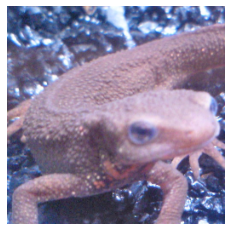

In [20]:
img = cv2.imread("/content/imori_256x256.png?raw=true")

print(type(img))
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Q.1. チャネル入れ替え

画像を読み込み、RGBをBGRの順に入れ替えよ。

画像の赤成分を取り出すには、以下のコードで可能。 cv2.imread()関数ではチャネルがBGRの順になることに注意！ これで変数redにimori.jpgの赤成分のみが入る。

```
import cv2
img = cv2.imread("/content/imori_256x256.png?raw=true")
red = img[:, :, 2].copy()
```

A.1. 

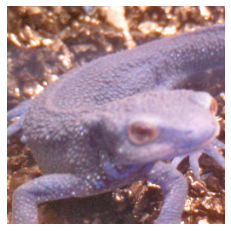

In [21]:
b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

inv_img = img.copy()
inv_img[:,:,0] = r
inv_img[:,:,1] = g
inv_img[:,:,2] = b

plt.axis('off')
plt.imshow(cv2.cvtColor(inv_img, cv2.COLOR_BGR2RGB))

## Q.2. グレースケール化

画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

```
Y = 0.2126 R + 0.7152 G + 0.0722 B
```

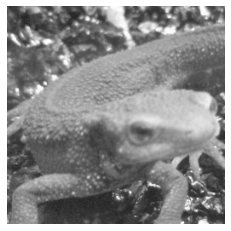

In [22]:
# 自分の回答
b = img[:,:,0].copy()
g = img[:,:,1].copy()
r = img[:,:,2].copy()

gray_img = img.copy()
for i in range(3):
  gray_img[:,:,i] = 0.2126*r + 0.7152*g + 0.0722*b

plt.axis('off')
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

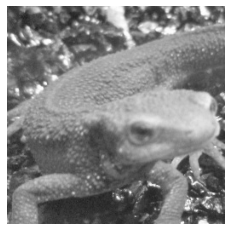

In [23]:
# 理想の回答
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray_img = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray_img = gray_img.astype(np.uint8)
#print(gray_img)

# Save result
cv2.imwrite("gray_img.jpg", gray_img)
gray_img = cv2.imread("gray_img.jpg")
plt.axis('off')
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

## Q.3. 二値化

画像を二値化せよ。 二値化とは、画像を黒と白の二値で表現する方法である。 ここでは、グレースケールにおいて閾値を128に設定し、下式で二値化する。

```
y = { 0 (if y < 128)
     255 (else) 
```

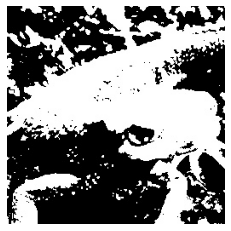

In [24]:
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray_img = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray_img = gray_img.astype(np.uint8)

binary_img = gray_img.copy()
binary_img[binary_img < 128] = 0
binary_img[binary_img >= 128] = 255

cv2.imwrite("binary_img.jpg", binary_img)
binary_img = cv2.imread("binary_img.jpg")
plt.axis('off')

plt.imshow(cv2.cvtColor(binary_img, cv2.COLOR_BGR2RGB))

## Q.4. 大津の二値化

大津の二値化を実装せよ。 大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する手法である。 これはクラス内分散とクラス間分散の比から計算される。

- 閾値t未満をクラス0, t以上をクラス1とする。
- w0, w1 ... 閾値tにより分離された各クラスの画素数の割合 (w0 + w1 = 1を満たす)
- S0^2, S1^2 ... 各クラスの画素値の分散
- M0, M1 ... 各クラスの画素値の平均値

とすると、

```
クラス内分散 Sw^2 = w0 * S0^2 + w1 * S1^2
クラス間分散 Sb^2 = w0 * (M0 - Mt)^2 + w1 * (M1 - Mt)^2 = w0 * w1 * (M0 - M1) ^2
画像全体の画素の分散 St^2 = Sw^2 + Sb^2 = (const)
以上より、分離度は次式で定義される。
分離度 X = Sb^2 / Sw^2 = Sb^2 / (St^2 - Sb^2)
```

となるので、

```
argmax_{t} X = argmax_{t} Sb^2
```

となる。すなわち、`Sb^2 = w0 * w1 * (M0 - M1) ^2` が最大となる、閾値tを二値化の閾値とすれば良い。

threshold >> 128


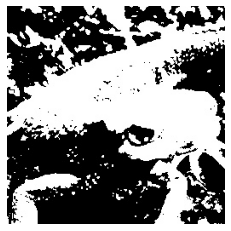

In [25]:
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray_img = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray_img = gray_img.astype(np.uint8)

height ,width ,color = img.shape
#print(h,w,c)

max_sigma = 0
max_th = 0

for th in range(255):
  v0 = gray_img[np.where(gray_img < th)]
  m0 = np.mean(v0) if len(v0) > 0 else 0.
  w0 = len(v0) / (height * width)
  v1 = gray_img[np.where(gray_img >= th)]
  m1 = np.mean(v1) if len(v1) > 0 else 0.
  w1 = 1 - w0
  sigma = w0 * w1 * ((m0 - m1) ** 2)
  if sigma > max_sigma:
    max_sigma = sigma
    max_th = th

print("threshold >>", max_th)

binary_img = gray_img.copy()
binary_img[binary_img < max_th] = 0
binary_img[binary_img >= max_th] = 255

cv2.imwrite("binary_img.jpg", binary_img)
binary_img = cv2.imread("binary_img.jpg")
plt.axis('off')
plt.imshow(cv2.cvtColor(binary_img, cv2.COLOR_BGR2RGB))

## Q.5. HSV変換

HSV変換を実装して、色相Hを反転せよ。

HSV変換とは、Hue(色相)、Saturation(彩度)、Value(明度) で色を表現する手法である。

Hue ... 色合いを0~360度で表現し、赤や青など色の種類を示す。 ( 0 <= H < 360)
Saturation ... 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0<= S < 1)
Value ... 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)
RGB -> HSV変換は以下の式で定義される。

R,G,Bが[0, 1]の範囲にあるとする。

```
Max = max(R,G,B)
Min = min(R,G,B)

H =  { 0                            (if Min=Max)
       60 x (G-R) / (Max-Min) + 60  (if Min=B)
       60 x (B-G) / (Max-Min) + 180 (if Min=R)
       60 x (R-B) / (Max-Min) + 300 (if Min=G)
       
V = Max

S = Max - Min
```


HSV -> RGB変換は以下の式で定義される。


```
C = S

H' = H // 60

X = C (1 - |H' mod 2 - 1|)

(R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H' < 1)
                              (X, C, 0)  (if 1 <= H' < 2)
                              (0, C, X)  (if 2 <= H' < 3)
                              (0, X, C)  (if 3 <= H' < 4)
                              (X, 0, C)  (if 4 <= H' < 5)
                              (C, 0, X)  (if 5 <= H' < 6)
```

ここでは色相Hを反転(180を加算)し、RGBに直し画像を表示せよ。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in remainder
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in remainder


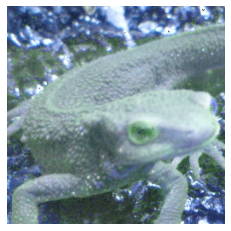

In [28]:
img = cv2.imread("/content/imori_256x256.png?raw=true").astype(np.float32) / 255.


out = np.zeros_like(img)

max_rgb = np.max(img, axis=2)
min_rgb = np.min(img, axis=2)
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_rgb)

# white
H[np.where(max_rgb == min_rgb)] = 0

## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_rgb[ind] - min_rgb[ind])

## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_rgb[ind] - min_rgb[ind])

## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_rgb[ind] - min_rgb[ind])

V = max_rgb.copy()
S = max_rgb.copy() - min_rgb.copy()

H = (H + 180) % 360

C = S
H_ = H / 60
X = C * (1 - np.abs( H_ % 2 - 1))
Z = np.zeros_like(H)

vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

for i in range(6):
    ind = np.where((i <= H_) & (H_ < (i+1)))
    out[..., 0][ind] = (V-C)[ind] + vals[i][0][ind]
    out[..., 1][ind] = (V-C)[ind] + vals[i][1][ind]
    out[..., 2][ind] = (V-C)[ind] + vals[i][2][ind]

out[np.where(max_rgb == min_rgb)] = 0
out = (out * 255).astype(np.uint8) 

cv2.imwrite("hsv_img.jpg", out)
hsv_img = cv2.imread("hsv_img.jpg")
plt.axis('off')
plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_BGR2RGB))


# https://deepage.net/features/numpy-max.html

In [29]:
# a[..., 1] と a[:, 1] の違い
import numpy as np
a = np.array([[[1,2,3],[2,3,4],[3,4,5],[4,5,6]],[[9,8,7],[8,7,6],[7,6,5],[6,5,4]]])

print("a")
print(a)
print("a[...,1] is below:")
print(a[...,1])
print("a[:, 1] is below:")
print(a[:,1])

# https://qiita.com/toda_tech/items/f9caa8621ca0c1fa3f98

a
[[[1 2 3]
  [2 3 4]
  [3 4 5]
  [4 5 6]]

 [[9 8 7]
  [8 7 6]
  [7 6 5]
  [6 5 4]]]
a[...,1] is below:
[[2 3 4 5]
 [8 7 6 5]]
a[:, 1] is below:
[[2 3 4]
 [8 7 6]]
